Mean Squared Error: 0.1718688000438738
R-squared: 0.9453951389852665


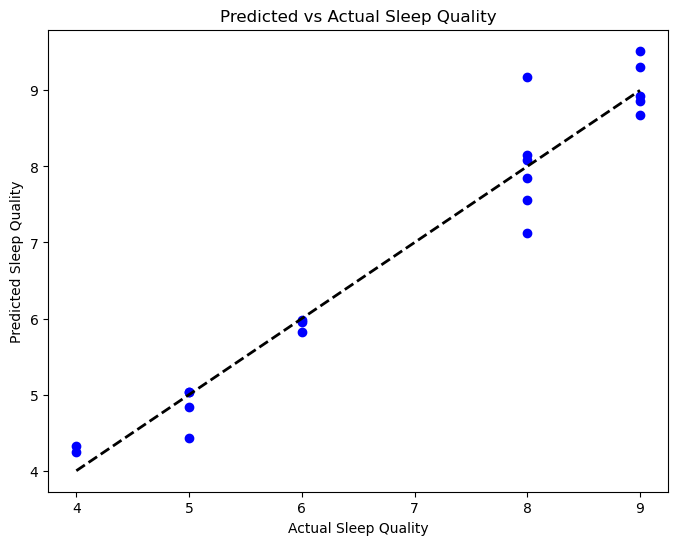

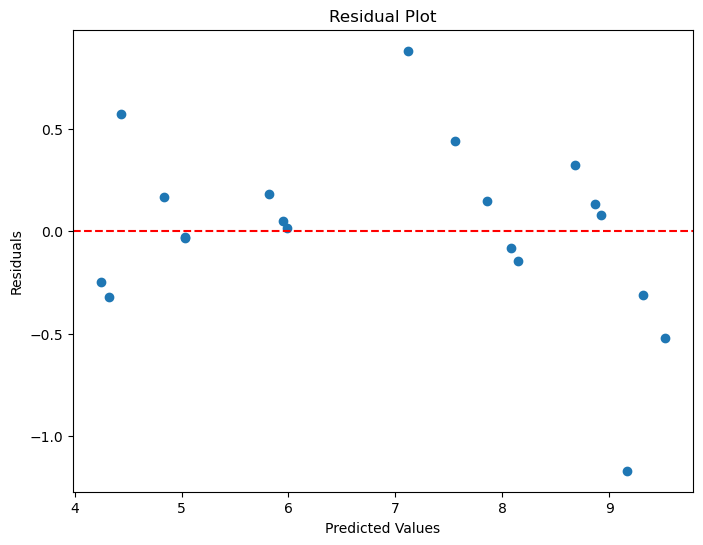

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('Health_Sleep_Statistics.csv')

# Step 2: Function to convert 'HH:MM' format to decimal hours
def convert_time_to_hours(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60.0

# Step 3: Convert 'Bedtime' and 'Wake-up Time' to decimal hours
df['Bedtime'] = df['Bedtime'].apply(convert_time_to_hours)
df['Wake-up Time'] = df['Wake-up Time'].apply(convert_time_to_hours)

# Step 4: Calculate Sleep Duration
df['Sleep Duration'] = df['Wake-up Time'] - df['Bedtime']
# Handle negative sleep durations (if the bedtime is after midnight)
df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: x + 24 if x < 0 else x)

# Step 5: Normalize numerical features
numerical_cols = ['Age', 'Daily Steps', 'Calories Burned', 'Sleep Duration']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 6: Prepare data for the model
X = df.drop(columns=['User ID', 'Gender', 'Physical Activity Level', 'Dietary Habits', 
                     'Sleep Disorders', 'Medication Usage', 'Sleep Quality'])
y = df['Sleep Quality']

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Model evaluation on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 10: Visualizations 
# Predicted vs Actual Sleep Quality
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Sleep Quality")
plt.ylabel("Predicted Sleep Quality")
plt.title("Predicted vs Actual Sleep Quality")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


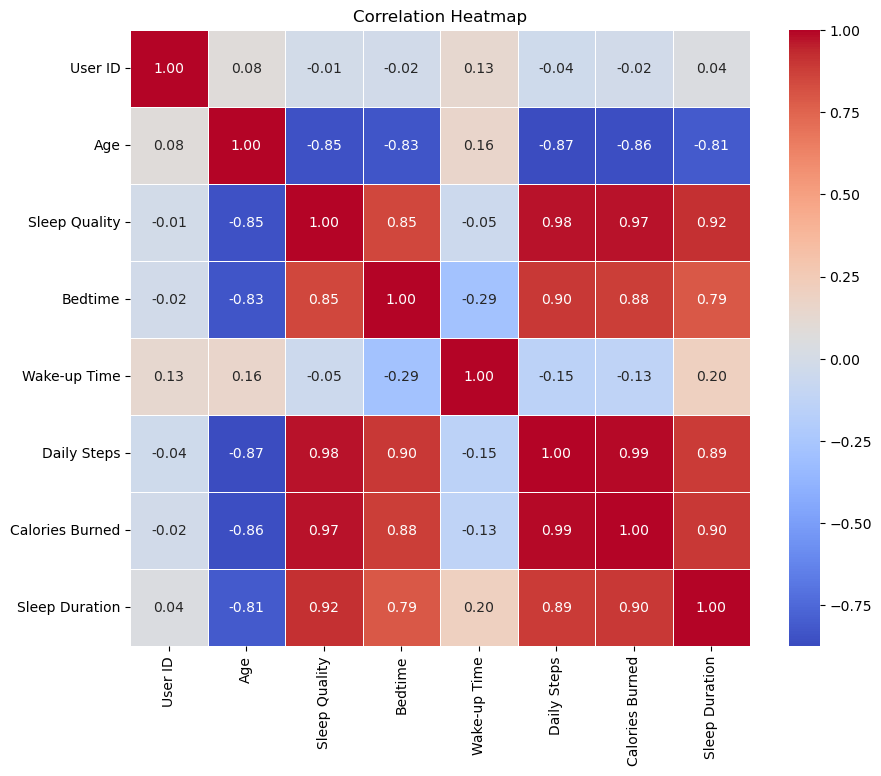

In [16]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
